This notebook will be used for the Coursera Capstone project.

In [1]:
#import libraries
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


## 1. Introduction/Business Problem

In today's world many people can't imagine their lives without a car. Cars have become an integral part of modern humans, making it easier not only to perform everyday activities but also to travel long distance. Nonetheless, road vehicles are also the most unsafe of all available to humans. Traffic collisions are in first place in terms of the number of deaths and injuries. According to these parameters, cars significantly overtake railway, aviation and water transport.

Unfortunately, car accidents occur for many reasons, including both technological and human factors. An accident can happen due to the fault of a tired driver, due to icing of the road surface or a malfunction of the brake system. However, the risk of getting into an accident is often influenced by external factors, such as the day of the week, weather conditions and the quality of the road itself.

Many car companies are working on fully autonomous cars, which could potentially reduce the amount of car accidents. Until then regular cars will remain popular. Therefore, it would be great to have a mechanism that could warn you, given the weather and the road conditions, about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to. 



Thus, the goal of this project is:
#### 1.	to identify and analyze the factors that cause traffic collisions, and
#### 2.	to create a model that will predict the severity of car accidents.

The findings may be useful for improving road safety or for insurance companies planning to introduce life and health insurance programs for drivers and passengers. 



## 2. Data

For this project I will be using a shared dataframe about accident severity. The dataset includes all types of collisions in Seattle for the timeframe from 2004 to mid-2020. The dataset has an extensive amount of observations - it includes 194,673 samples. The total amount of attributes in the dataframe is 37. 

In [2]:
#download data
!wget -O DataCollisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-06 21:14:21--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘DataCollisions.csv’

DataCollisions.csv  100%[===================>]  70.49M  22.3MB/s    in 3.2s    

2020-10-06 21:14:25 (22.3 MB/s) - ‘DataCollisions.csv’ saved [73917638/73917638]



In [3]:
#read the online file by the URL provided above, and assign it to variable "df"
df = pd.read_csv('DataCollisions.csv') 

#check the top n rows of the dataframe
df.head() 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#check size of dataframe (rows, columns)
df.shape

(194673, 38)

In [5]:
#check the name of columns(headers) 
df.columns 

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
#check the number of missing values in each column
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## 3. Methodology

As mentioned above, not all attributes will be useful for this project. Thus, I will drop the columns that have no particular use for this project such as specialized codes and keys, GPS coordinates, etc. 

Further data analysis will be structured as follows:

Firstly, I will visually illustrate the main characteristics of the dataset using the following attributes:

* 'SEVERITYDESC' - A detailed description of the severity of the collision;
* 'ADDRTYPE' - Collision address type (Alley, Block, Intersection);
* 'PERSONCOUNT' - The number of pedestrians involved in the collision;
* 'VEHCOUNT' - The number of vehicles involved in the collision;
* 'INCDATE' - The date of the incident;
* 'WEATHER' - A description of the weather conditions during the time of the collision;
* 'ROADCOND' - The condition of the road during the collision;
* 'LIGHTCOND' - The light conditions during the collision;

Secondly, I will create a model that will predict the severity of car accidents. In this project,  'SEVERITYCODE' is the target variable, which is used to measure the severity of an accident from 0 to 4 within the dataset. In order to classify the target variable I will use 3 independent variables:

* 'WEATHER' - A description of the weather conditions during the time of the collision;
* 'ROADCOND' - The condition of the road during the collision;
* 'LIGHTCOND' - The light conditions during the collision.

**Note**: initially the attribute “SPEEDING” was also included in the selection. However, it has more than 185,000 missing values, which can create a biased model. Therefore, this attribute was eventually dropped.

In this project I will use 3 algorithms, Logistic Regression, K-Nearest Neighbors and Decision Tree in order to verify accuracy of the model.

## 4. Data Analysis

### 4.1 Data Pre-processing

In [7]:
#drop the unnecessary columns

df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'COLLISIONTYPE',
       'PEDCOUNT', 'PEDCYLCOUNT',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis=1, inplace=True)
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,PERSONCOUNT,VEHCOUNT,INCDATE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Injury Collision,2,2,2013/03/27 00:00:00+00,Overcast,Wet,Daylight
1,1,Block,Property Damage Only Collision,2,2,2006/12/20 00:00:00+00,Raining,Wet,Dark - Street Lights On
2,1,Block,Property Damage Only Collision,4,3,2004/11/18 00:00:00+00,Overcast,Dry,Daylight
3,1,Block,Property Damage Only Collision,3,3,2013/03/29 00:00:00+00,Clear,Dry,Daylight
4,2,Intersection,Injury Collision,2,2,2004/01/28 00:00:00+00,Raining,Wet,Daylight


In [8]:
#make headings in lowercase

df.columns=df.columns.str.lower()

In [9]:
#make values in lowercase

df["addrtype"]=df["addrtype"].str.lower()
df["severitydesc"]=df["severitydesc"].str.lower()
df["weather"]=df["weather"].str.lower()
df["roadcond"]=df["roadcond"].str.lower()
df["lightcond"]=df["lightcond"].str.lower()

In [10]:
#re-arrange the columns

df=df[['severitycode','severitydesc', 'addrtype','personcount', 'vehcount','weather', 'roadcond', 'lightcond','incdate']]

In [11]:
#check the number of missing values in each column
df.isnull().sum()

severitycode       0
severitydesc       0
addrtype        1926
personcount        0
vehcount           0
weather         5081
roadcond        5012
lightcond       5170
incdate            0
dtype: int64

In [12]:
#drop all rows with missing values
df.dropna(subset=['addrtype', 'weather', 'roadcond', 'lightcond',], axis=0, inplace=True)

#reset index, because we droped the rows
df.reset_index(drop=True, inplace=True)

In [13]:
#summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187525 entries, 0 to 187524
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   severitycode  187525 non-null  int64 
 1   severitydesc  187525 non-null  object
 2   addrtype      187525 non-null  object
 3   personcount   187525 non-null  int64 
 4   vehcount      187525 non-null  int64 
 5   weather       187525 non-null  object
 6   roadcond      187525 non-null  object
 7   lightcond     187525 non-null  object
 8   incdate       187525 non-null  object
dtypes: int64(3), object(6)
memory usage: 12.9+ MB


Now, we have finally obtained the cleaned dataset with no missing values and all data in its proper format. 

The final size of the dataframe includes 187524 entries and 9 attributes.

In [14]:
df.head()

,severitycode,severitydesc,addrtype,personcount,vehcount,weather,roadcond,lightcond,incdate
0,2,injury collision,intersection,2,2,overcast,wet,daylight,2013/03/27 00:00:00+00
1,1,property damage only collision,block,2,2,raining,wet,dark - street lights on,2006/12/20 00:00:00+00
2,1,property damage only collision,block,4,3,overcast,dry,daylight,2004/11/18 00:00:00+00
3,1,property damage only collision,block,3,3,clear,dry,daylight,2013/03/29 00:00:00+00
4,2,injury collision,intersection,2,2,raining,wet,daylight,2004/01/28 00:00:00+00


###  4.2 Data Analysis and Visualization

In [15]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot') # optional: for ggplot-like style

### Severity types

In [16]:
# total values of severity types
df['severitydesc'].value_counts()

property damage only collision    130642
injury collision                   56883
Name: severitydesc, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

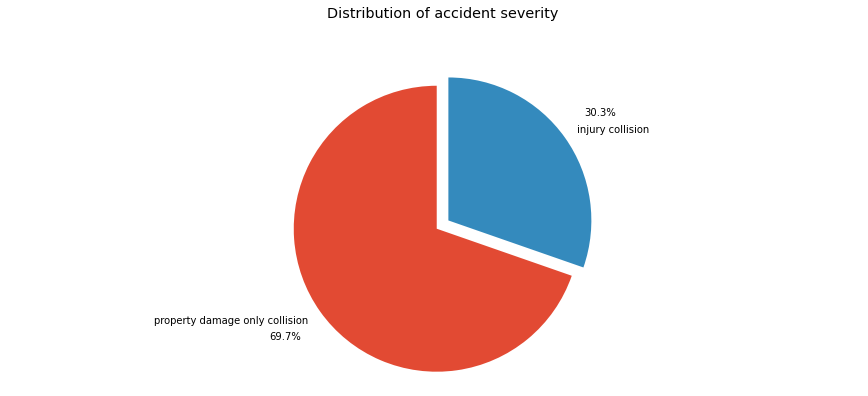

In [17]:
#plot severity distribution

df['severitydesc'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,                    
                            pctdistance=1.3,
                            explode=[0.1,0])
plt.title('Distribution of accident severity', y=1.12) 
plt.ylabel(' ')

plt.axis('equal') 
plt.show

### Annual amount of traffic accidents

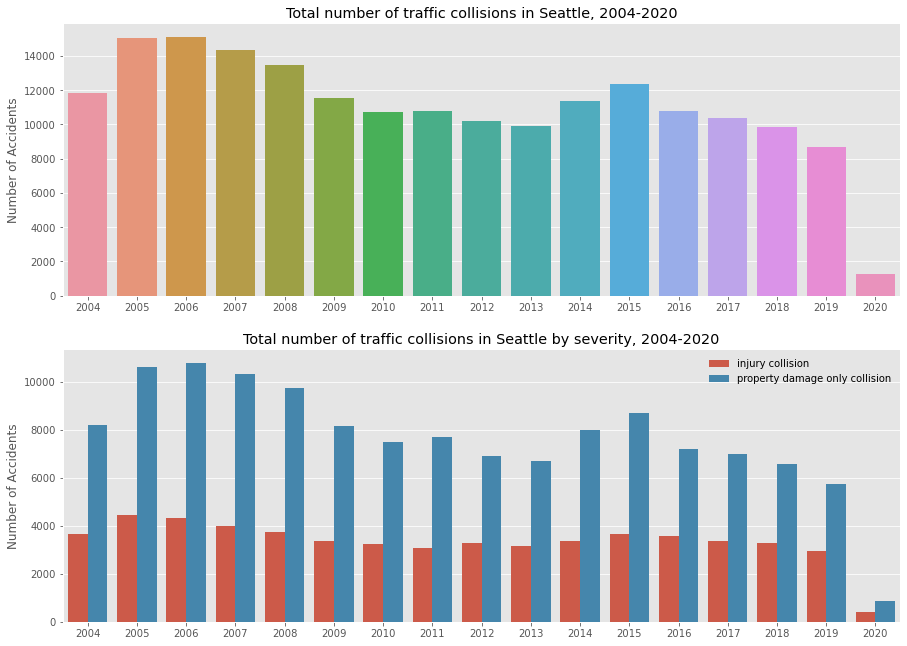

In [18]:
# plot annual amount of traffic accidents in Seattle

df['year'] = pd.DatetimeIndex(df['incdate']).year
df['year'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, figsize=(15,11 ))


#1
sns.countplot(x="year",
              data=df,
              ax=ax1)
ax1.set_title('Total number of traffic collisions in Seattle, 2004-2020')
ax1.set_ylabel("Number of Accidents")
ax1.set_xlabel("")

#2
sns.countplot(x="year",
              hue="severitydesc",
              data=df,
              ax=ax2)
ax2.set_title('Total number of traffic collisions in Seattle by severity, 2004-2020')
ax2.set_ylabel("Number of Accidents")
ax2.set_xlabel("")
ax2.legend(frameon=False, loc=1)

sns.set_style('whitegrid')
sns.despine()

### Address type of traffic accidents

In [19]:
df['addrtype'].value_counts()

block           123321
intersection     63462
alley              742
Name: addrtype, dtype: int64

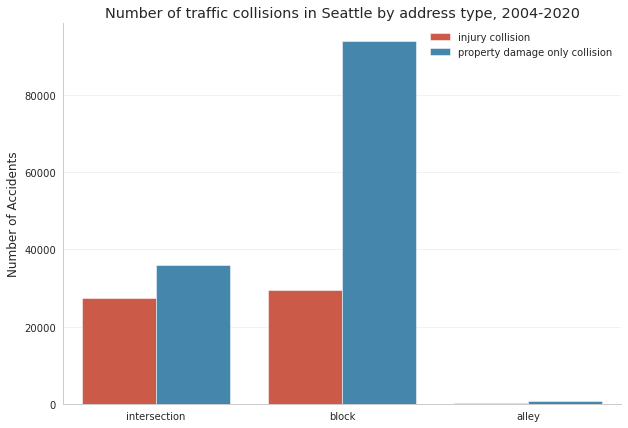

In [20]:
# plot traffic accidents by address type

fig,  ax2 = plt.subplots(figsize=(10,7 ))


#2
sns.countplot(x="addrtype", hue="severitydesc", data=df, ax=ax2)
ax2.set_title('Number of traffic collisions in Seattle by address type, 2004-2020')
ax2.set_ylabel("Number of Accidents")
ax2.set_xlabel("")
ax2.legend(frameon=False, loc=1)

ax2.set_axisbelow(True)
ax2.yaxis.grid(True, color='#EEEEEE')
ax2.xaxis.grid(False)

sns.set_style('white')
sns.despine()

### Number of People and Vehicles involved in traffic accidents in Seattle, 2004-2020

In [21]:
df['personcount'].value_counts().head()

2    109569
3     34988
4     14389
1     11582
5      6560
Name: personcount, dtype: int64

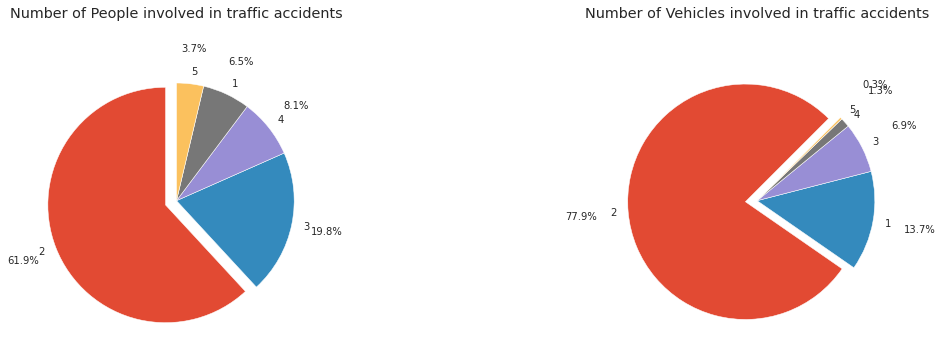

In [22]:
#plot number of people and vehicles involved in accidents in Seattle

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5))
ex = [0.1, 0, 0, 0, 0]

#1
df['personcount'].value_counts().head().plot(kind='pie',
                                             autopct='%1.1f%%',
                                             startangle=90,
                                             pctdistance=1.3, 
                                             explode=ex,
                                             ax=ax1)

ax1.set_title('Number of People involved in traffic accidents', y=1.1) # add a title to the histogram
ax1.set_ylabel('') # add y-label
ax1.set_xlabel('') # add x-label

#2

df['vehcount'].value_counts().head().plot(kind='pie',
                                          autopct='%1.1f%%',
                                          startangle=45,
                                          pctdistance=1.4,
                                          explode=ex,
                                          ax=ax2)

ax2.set_title('Number of Vehicles involved in traffic accidents', y=1.1) # add a title to the histogram
ax2.set_ylabel('') # add y-label
ax2.set_xlabel('') # add x-label

fig.tight_layout()

### Weather, Road and Light conditions and Accident Severity

In [23]:
df["weather"].value_counts()

clear                       110499
raining                      32976
overcast                     27551
unknown                      14059
snowing                        896
other                          790
fog/smog/smoke                 563
sleet/hail/freezing rain       112
blowing sand/dirt               49
severe crosswind                25
partly cloudy                    5
Name: weather, dtype: int64

In [24]:
df["roadcond"].value_counts()

dry               123736
wet                47223
unknown            14009
ice                 1193
snow/slush           992
other                124
standing water       111
sand/mud/dirt         73
oil                   64
Name: roadcond, dtype: int64

In [25]:
df["lightcond"].value_counts()

daylight                    115408
dark - street lights on      48236
unknown                      12599
dusk                          5843
dawn                          2491
dark - no street lights       1526
dark - street lights off      1184
other                          227
dark - unknown lighting         11
Name: lightcond, dtype: int64

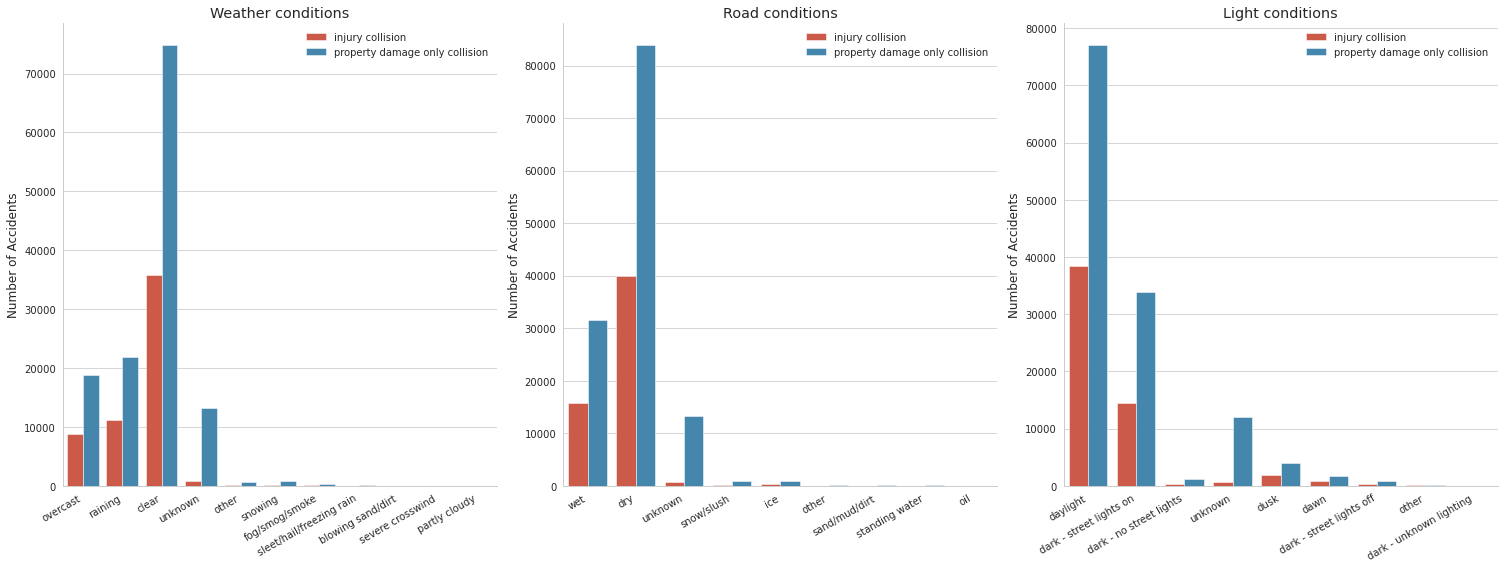

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21, 8))

x=rotation=90
#1
sns.countplot(x="weather", hue="severitydesc", data=df, ax=ax1)
ax1.set_title('Weather conditions') # add a title to the histogram
ax1.set_ylabel('Number of Accidents') # add y-label
ax1.set_xlabel('')
ax1.legend(frameon=False, loc=1)

#2
sns.countplot(x="roadcond", hue="severitydesc", data=df, ax=ax2)
ax2.set_title('Road conditions') # add a title to the histogram
ax2.set_ylabel('Number of Accidents') # add y-label
ax2.set_xlabel('')
ax2.legend(frameon=False, loc=1)

#3
sns.countplot(x="lightcond", hue="severitydesc", data=df,ax=ax3)
ax3.set_title('Light conditions') # add a title to the histogram
ax3.set_ylabel('Number of Accidents') # add y-label
ax3.set_xlabel('')
ax3.legend(frameon=False, loc=1)

plt.draw()

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha='right')

fig.tight_layout()
sns.set_style("whitegrid")
sns.despine()

### 4.3 Model Development and Training

In [27]:
#create new dataframe with dependent and independent variables

model=df[['severitycode','weather', 'roadcond', 'lightcond']]
model.head()

,severitycode,weather,roadcond,lightcond
0,2,overcast,wet,daylight
1,1,raining,wet,dark - street lights on
2,1,overcast,dry,daylight
3,1,clear,dry,daylight
4,2,raining,wet,daylight


In [28]:
#Use label encoding technique to convert categorical variables to binary variables 

from sklearn.preprocessing import LabelEncoder

features = model[['weather', 'roadcond', 'lightcond']]

for feature in ['weather', 'roadcond', 'lightcond']:
    features[feature] = features[feature].astype('|S') 
    features[feature] = LabelEncoder().fit_transform(features[feature])

features.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,weather,roadcond,lightcond
0,4,8,5
1,6,8,2
2,4,0,5
3,1,0,5
4,6,8,5


In [29]:
#feature selection
X = features
y = model['severitycode'].values

In [30]:
#Train/Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (131267, 3) (131267,)
Test set: (56258, 3) (56258,)


In [31]:
#Normalize data

from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


array([[ 0.33715894,  1.48648276,  0.36200962],
       [ 1.04638501,  1.48648276, -1.4013662 ],
       [ 0.33715894, -0.70681843,  0.36200962],
       [-0.72668016, -0.70681843,  0.36200962],
       [ 1.04638501,  1.48648276,  0.36200962]])

In [32]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=0.01, solver='liblinear')
model_lr.fit(X_train, y_train)
model_lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

#Train model and predict
model_knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [34]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_tree.fit(X_train, y_train)
model_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 4.3 Model Evaluation

In [35]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

### Logistic regression

In [36]:
yhat_lr = model_lr.predict(X_test)
yhat_proba = model_lr.predict_proba(X_test)
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(y_train, model_lr.predict(X_train)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(y_test, yhat_lr))

Train set Logistic regression Accuracy:  0.6961307868695102
Test set Logistic regression Accuracy:  0.6979096306303103


In [37]:
#Evaluation
jaccard = jaccard_similarity_score(y_test, yhat_lr)
f1_score_lr = f1_score(y_test, yhat_lr, average='weighted')
precision_lr = precision_score(y_test, yhat_lr, average='weighted')
lr_report = ['Logistic Regression', round(jaccard,4), round(f1_score_lr,4), round(precision_lr,4)]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN

In [38]:
yhat_knn = model_knn.predict(X_test)
print("Train set KNN Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set KNN Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set KNN Accuracy:  0.6657728141878766
Test set KNN Accuracy:  0.6673006505741406


In [40]:
#Evaluation
jaccard = jaccard_similarity_score(y_test, yhat_knn)
f1_score_knn = f1_score(y_test, yhat_knn, average='weighted')
precision_knn = precision_score(y_test, yhat_knn, average='weighted')
knn_report = ['KNN', round(jaccard,4), round(f1_score_knn,4), round(precision_knn,4)]

### Decision tree 

In [45]:
yhat_tree = model_tree.predict(X_test)
print("Train set Decision Tree Accuracy: ", metrics.accuracy_score(y_train, model_tree.predict(X_train)))
print("Test set Decision Tree Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

Train set Decision Tree Accuracy:  0.6961307868695102
Test set Decision Tree Accuracy:  0.6979096306303103


In [42]:
#Evaluation
jaccard = jaccard_similarity_score(y_test, yhat_tree)
f1_score_tree = f1_score(y_test, yhat_tree, average='weighted')
precision_tree = precision_score(y_test, yhat_tree, average='weighted')
tree_report = ['Decision Tree', round(jaccard,4), round(f1_score_tree,4), round(precision_tree,4)]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
#Summary

Summary = pd.DataFrame(data=np.array([lr_report,knn_report, tree_report]), 
                      columns=['Algorithm', 'Jaccard', 'F1-score', 'Precision'])
Summary

,Algorithm,Jaccard,F1-score,Precision
0,Logistic Regression,0.6979,0.5737,0.4871
1,KNN,0.6673,0.6051,0.5958
2,Decision Tree,0.6979,0.5737,0.4871
